# Simple gender analysis

- ## Imports

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import unicodedata

import os, sys, json, re, argparse, urllib2, html5lib
from bs4 import BeautifulSoup, Tag, UnicodeDammit
import pandas as pd
from pandas.io.json import json_normalize
import time
import math

from crawler import *

/home/duc-vinh/anaconda2/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


- ## Crawl

In [13]:
genre_url='http://www.imsdb.com/genre/Action'
scripts_by_genre('action','../data/all_script/action/')

http://www.imsdb.com/scripts/Star-Wars-Revenge-of-the-Sith.html
Found exception 'NoneType' object has no attribute 'find' in parsing.
http://www.imsdb.com/scripts/Star-Wars-The-Force-Awakens.html
Getting script @ http://www.imsdb.com/scripts/Star-Wars-The-Force-Awakens.html.
      Done parsing script at http://www.imsdb.com/scripts/Star-Wars-The-Force-Awakens.html in 1.36963796616
-----------------
----Did not find scriptfile for http://www.imsdb.com/Movie%20Scripts/Batman%20Begins%20Script.html.
http://www.imsdb.com/scripts/Collateral.html
Found exception 'NoneType' object has no attribute 'find' in parsing.
http://www.imsdb.com/scripts/Jackie-Brown.html
Found a <pre> inside the <pre>
Getting script @ http://www.imsdb.com/scripts/Jackie-Brown.html.
      Done parsing script at http://www.imsdb.com/scripts/Jackie-Brown.html in 1.55606985092
-----------------
http://www.imsdb.com/scripts/15-Minutes.html
Found a <pre> inside the <pre>
Getting script @ http://www.imsdb.com/scripts/15-Minu

KeyboardInterrupt: 

In [2]:
genre_url='http://www.imsdb.com/genre/Romance'
scripts_by_genre('romance','../data/all_script/romance/')

http://www.imsdb.com/scripts/Star-Wars-Revenge-of-the-Sith.html
Found exception 'NoneType' object has no attribute 'find' in parsing.
http://www.imsdb.com/scripts/Star-Wars-The-Force-Awakens.html
Getting script @ http://www.imsdb.com/scripts/Star-Wars-The-Force-Awakens.html.
      Done parsing script at http://www.imsdb.com/scripts/Star-Wars-The-Force-Awakens.html in 1.26432299614
-----------------
----Did not find scriptfile for http://www.imsdb.com/Movie%20Scripts/Batman%20Begins%20Script.html.
http://www.imsdb.com/scripts/Collateral.html
Found exception 'NoneType' object has no attribute 'find' in parsing.
http://www.imsdb.com/scripts/Jackie-Brown.html
Found a <pre> inside the <pre>
Getting script @ http://www.imsdb.com/scripts/Jackie-Brown.html.
      Done parsing script at http://www.imsdb.com/scripts/Jackie-Brown.html in 1.42752885818
-----------------
http://www.imsdb.com/scripts/10-Things-I-Hate-About-You.html
Found a <pre> inside the <pre>
Getting script @ http://www.imsdb.com

KeyboardInterrupt: 

- ### Extract functions

In [6]:
path='../data/top100 per year/curated/'
col=['classement','titre','annee','annee_','categorie','realisateur','url','url_script']
titles=pd.DataFrame(columns=col)
for year in range(2000,2017):
    df=get_curated(year,path)
    df['annee_']=year
    titles = pd.concat([titles,df])

In [7]:
#retraiter la colonne catégorie
titles.reset_index(inplace=True,drop=True)
titles['categorie']=titles['categorie'].apply(lambda x : x.replace('\n','').replace(' ',''))
titles['categorie1'], titles['categorie2'], titles['categorie3']= titles['categorie'].str.split(',', 2).str

In [8]:
#consolider le dataframe pour les liens qui ont un lien script
titles = titles.dropna(subset=['url_script'],how='any')
titles.reset_index(inplace=True,drop=True)
titles

,annee,annee_,categorie,classement,durée,realisateur,titre,url,url_script,categorie1,categorie2,categorie3
0,(2000),2000.0,"Adventure,Drama,Romance",2.0,143 min,Robert Zemeckis,Cast Away,http://www.imsdb.com/Movie Scripts/Cast Away S...,http://www.imsdb.com/scripts/Cast-Away.html,Adventure,Drama,Romance
1,(2000),2000.0,"Action,Adventure,Drama",4.0,155 min,Ridley Scott,Gladiator,http://www.imsdb.com/Movie Scripts/Gladiator S...,http://www.imsdb.com/scripts/Gladiator.html,Action,Adventure,Drama
2,(2000),2000.0,"Action,Adventure,Sci-Fi",8.0,104 min,Bryan Singer,X-Men,http://www.imsdb.com/Movie Scripts/X-Men Scrip...,http://www.imsdb.com/scripts/X-Men.html,Action,Adventure,Sci-Fi
3,(2000),2000.0,"Drama,Fantasy,Horror",10.0,130 min,Robert Zemeckis,What Lies Beneath,http://www.imsdb.com/Movie Scripts/What Lies B...,http://www.imsdb.com/scripts/What-Lies-Beneath...,Drama,Fantasy,Horror
4,(2000),2000.0,"Action,Adventure,Fantasy",12.0,120 min,Ang Lee,"Crouching Tiger, Hidden Dragon",http://www.imsdb.com/Movie Scripts/Crouching T...,"http://www.imsdb.com/scripts/Crouching-Tiger,-...",Action,Adventure,Fantasy
5,(2000),2000.0,"Biography,Drama",13.0,131 min,Steven Soderbergh,Erin Brockovich,http://www.imsdb.com/Movie Scripts/Erin Brocko...,http://www.imsdb.com/scripts/Erin-Brockovich.html,Biography,Drama,NaN
6,(2000),2000.0,"Action,Adventure,Comedy",14.0,98 min,McG,Charlie's Angels,http://www.imsdb.com/Movie Scripts/Charlie's A...,http://www.imsdb.com/scripts/Charlie's-Angels....,Action,Adventure,Comedy
7,(2000),2000.0,"Crime,Drama,Thriller",15.0,147 min,Steven Soderbergh,Traffic,http://www.imsdb.com/Movie Scripts/Traffic Scr...,http://www.imsdb.com/scripts/Traffic.html,Crime,Drama,Thriller
8,(2000),2000.0,"Drama,Mystery,Sci-Fi",23.0,106 min,M. Night Shyamalan,Unbreakable,http://www.imsdb.com/Movie Scripts/Unbreakable...,http://www.imsdb.com/scripts/Unbreakable.html,Drama,Mystery,Sci-Fi
9,(2000),2000.0,"Horror,Mystery",27.0,116 min,Wes Craven,Scream 3,http://www.imsdb.com/Movie Scripts/Scream 3 Sc...,http://www.imsdb.com/scripts/Scream-3.html,Horror,Mystery,NaN


In [9]:
#les différentes catégories:
l=list(titles.categorie1)+list(titles.categorie2)+list(titles.categorie3)
set(l)

{nan,
 u'Action',
 u'Adventure',
 u'Animation',
 u'Biography',
 u'Comedy',
 u'Crime',
 u'Drama',
 u'Family',
 u'Fantasy',
 u'History',
 u'Horror',
 u'Music',
 u'Musical',
 u'Mystery',
 u'Romance',
 u'Sci-Fi',
 u'Sport',
 u'Thriller',
 u'War',
 u'Western'}

- ### Analysis Functions

In [4]:
def clean_character(char):
    if isinstance(char,unicode) or isinstance(char,str):
        char=char.replace('\n','').replace('*','').replace('O/S','').replace('V.O.','')
        char=re.sub(' +',' ',char)
        if 'CONTINUED' in char:
            return u'CONTINUED'
        if '(' in char or ')' in char:
            regex = re.compile(".*?\((.*?)\)")
            to_delete = re.findall(regex, char)
            for e in to_delete:
                char=char.replace('(%s)' %e,'')
            if char=='' or ')'in char:
                return None
            else:
                return char.rstrip() #delete lose end white space
        else:
            return char.rstrip()
    else:
        return None
    
def continued_speech(char_vector):
    char_vector=list(char_vector)
    while 'CONTINUED' in char_vector:
        count=0
        idx=char_vector.index("CONTINUED")
        for element in char_vector[idx-1::-1]:
            #if (isinstance(element,str) or isinstance(element,unicode)) and (element!='unknown'):
            if element and element!='unknown':
                char_vector[idx]=char_vector[idx-1-count]
                #print('Replaces CONTINUED with %s' %(char_vector[idx-1-count]))
                break
            count=count+1
            if count==len(char_vector[idx-1::-1]):
                char_vector[idx]='unknown'
                break
    return char_vector


# to remove outliers
def principal_characters(char_dic):
    mean = 0
    for i, j in char_dic.items():
        mean = mean + j
    mean = mean / len(char_dic)

    stddev = 0
    for i, j in char_dic.items():
        stddev = stddev + (j - mean)*(j - mean)
    stddev = stddev / len(char_dic)
    stddev = math.sqrt(stddev)

    temp = {}
    for i, j in char_dic.items():
        if (math.fabs(j - mean) < 3*stddev):
            temp[i] = j
    print(stddev,mean)
    return temp


def char_analysis(df):
    d=dict(Counter(df['character_clean']))
    d={key: value for key, value in d.items() 
                 if key}
    charlist = sorted(d)
    gender = dict()
    lines=[element.split('\n') for element in df['text']]
    lines=[item for sublist in lines for item in sublist]

    for char in charlist:
        m, f, p = 0, 0, 0 
        for i in range(len(lines)):
            srch = re.search(char, lines[i], re.I)
            if not srch:
                continue
            if srch.group().isupper():
                continue
            else:
                k, k_range = -1, 2
                while k + i + 1 < len(lines):
                    k = k + 1
                    m = m + len(re.findall("\s+he", lines[k+i], re.I)) + len(re.findall("\s+him", lines[k+i], re.I))
                    f = f + len(re.findall("\s+she", lines[k+i], re.I)) + len(re.findall("\s+her", lines[k+i], re.I))
                    if lines[k+i].isupper():
                        break
                    if k >= k_range:
                        break
                k, k_range = -1, 4
                while k + i + 1 < len(lines):
                    k = k + 1
                    m1, m2, m3, m4 = re.search("\s+he", lines[k+i], re.I), re.search("\s+him", lines[k+i], re.I),\
                                    re.search("\s+she", lines[k+i], re.I), re.search("\s+her", lines[k+i], re.I)
                    if m1:
                        if m2:
                            mc = min(m1.span()[0], m2.span()[0])
                        else:
                            mc = m1.span()[0]
                    else:
                        mc = len(lines[k+i])
                    if m3:
                        if m4:
                            fc = min(m3.span()[0], m4.span()[0])
                        else:
                            fc = m3.span()[0]
                    else:
                        fc = len(lines[k+i])
                    if not(m1 or m2 or m3 or m4):
                        continue
                    else:
                        if (mc < fc):
                            p = p - 1
                        else:
                            p = p + 1
                        break
                    if lines[k+i].isupper():
                        break
                    if k >= k_range:
                        break
        gender[char] = m, f, p

    for char, g in gender.items():
        g_score = 2*g[1] - g[0] 
        g_sum = g[1]+g[0]
        g_score = g_score
        if (g_sum == 0.0) :#or (0 == 1):
            #print(char+" Undetermined ")
            gender[char] = "?" #0, 0, -1
        elif g_score > 0:
            #print(char+" Female "+str(g[0])+","+str(g[1])+","+str(g[2])+","+str(g_score))
            gender[char] = "F" #0, 0, 1
        else:
            #print(char+" Male", " ", str(g[0])+","+str(g[1])+","+str(g[2])+","+str(g_score))
            gender[char] = "M" #0, 0, 0
            
    return d,gender

- ### Script loader and parser

In [11]:
output_actions=read_all_files('../data/all_script/action/',sep='|')
output_romances=read_all_files('../data/all_script/romance/',sep='|')

Getting script @ http://www.imsdb.com/scripts/Gladiator.html.
      Done parsing script at http://www.imsdb.com/scripts/Gladiator.html in 2.55342006683
-----------------
Found a <pre> inside the <pre>
Getting script @ http://www.imsdb.com/scripts/X-Men.html.
list index out of range
Getting script @ http://www.imsdb.com/scripts/Crouching-Tiger,-Hidden-Dragon.html.
      Done parsing script at http://www.imsdb.com/scripts/Crouching-Tiger,-Hidden-Dragon.html in 0.97320318222
-----------------
Getting script @ http://www.imsdb.com/scripts/Charlie's-Angels.html.
This script is too unstable to parse
      Done parsing script at http://www.imsdb.com/scripts/Charlie's-Angels.html in 1.26062297821
-----------------
Getting script @ http://www.imsdb.com/scripts/Hollow-Man.html.
      Done parsing script at http://www.imsdb.com/scripts/Hollow-Man.html in 1.24292397499
-----------------
Getting script @ http://www.imsdb.com/scripts/Reindeer-Games.html.
      Done parsing script at http://www.imsdb

In [5]:
#construct character info and add it to dataframe
output_actions_=[]
male_nb_speech=[]
female_nb_speech=[]
nb_of_errors=0
for df in output_actions:
    try:
        #print(df['text'][0].split('\n')[0])
        test=df['character'].apply(lambda x :clean_character(x))
        df['character_clean']=continued_speech(test)
        char,gender=char_analysis(df)
        output_actions_.append(char)
        #create gender column in dataframe:
        df['gender']=[gender.get(item,item)  for item in list(df['character_clean'])]
        male_nb_speech.append(len(df[df['gender']=='M']))
        female_nb_speech.append(len(df[df['gender']=='F']))
    except Exception as e:
        print('------Caught exception : %s' %e)
        nb_of_errors=nb_of_errors+1

------Caught exception : unbalanced parenthesis
------Caught exception : 'character'
------Caught exception : unbalanced parenthesis
------Caught exception : unbalanced parenthesis
------Caught exception : 'character'
------Caught exception : unbalanced parenthesis
------Caught exception : 'character'
------Caught exception : 'character'
------Caught exception : 'character'
------Caught exception : unbalanced parenthesis
------Caught exception : 'character'
------Caught exception : 'character'
------Caught exception : 'character'
------Caught exception : 'character'
------Caught exception : 'character'
------Caught exception : 'character'
------Caught exception : unbalanced parenthesis
------Caught exception : unbalanced parenthesis
------Caught exception : unexpected end of regular expression
------Caught exception : unbalanced parenthesis
------Caught exception : 'character'
------Caught exception : unbalanced parenthesis
------Caught exception : 'character'
------Caught exception : 

In [6]:
print('The number of errors is %s out of a total %s.' %(nb_of_errors,len(output_actions)))

The number of errors is 30 out of a total 174.


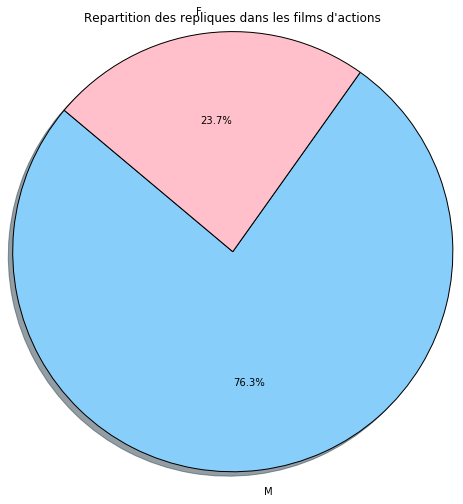

In [7]:
m=sum(male_nb_speech)
f=sum(female_nb_speech)

 
# Data to plot
labels = ["M","F"]
sizes = [m, f]
colors = ['lightskyblue', 'pink']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Repartition des repliques dans les films d'actions") 
plt.axis('equal')
plt.show()

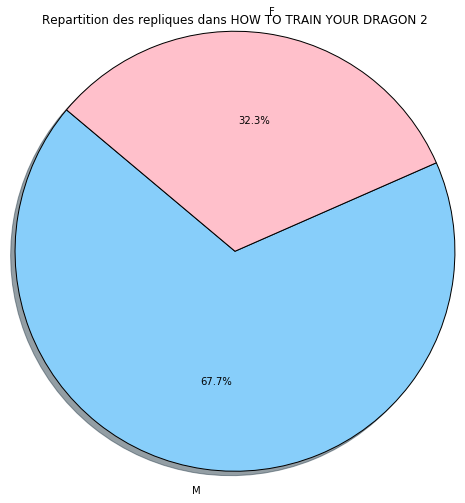

In [8]:
i=1
male_nb_speech=len(output_actions[i][output_actions[i]['gender']=='M'])
female_nb_speech=len(output_actions[i][output_actions[i]['gender']=='F'])

 
# Data to plot
labels = ["M","F"]
sizes = [male_nb_speech, female_nb_speech]
colors = ['lightskyblue', 'pink']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Repartition des repliques dans %s' %output_actions[i]['text'][0].split('\n')[0]) 
plt.axis('equal')
plt.show()

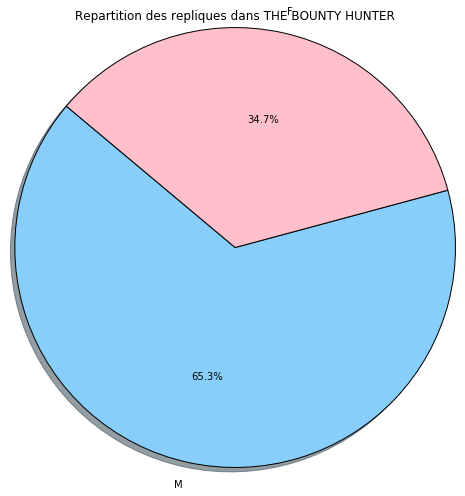

In [9]:
i=10
male_nb_speech=len(output_actions[i][output_actions[i]['gender']=='M'])
female_nb_speech=len(output_actions[i][output_actions[i]['gender']=='F'])

 
# Data to plot
labels = ["M","F"]
sizes = [male_nb_speech, female_nb_speech]
colors = ['lightskyblue', 'pink']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Repartition des repliques dans %s' %output_actions[i]['text'][0].split('\n')[0]) 
plt.axis('equal')
plt.show()

In [10]:
#construct character info and add it to dataframe
output_romances_=[]
male_nb_speech=[]
female_nb_speech=[]
nb_of_errors=0
for df in output_romances:
    try:
        #print(df['text'][0].split('\n')[0])
        test=df['character'].apply(lambda x :clean_character(x))
        df['character_clean']=continued_speech(test)
        char,gender=char_analysis(df)
        output_romances_.append(char)
        #create gender column in dataframe:
        df['gender']=[gender.get(item,item)  for item in list(df['character_clean'])]
        male_nb_speech.append(len(df[df['gender']=='M']))
        female_nb_speech.append(len(df[df['gender']=='F']))
    except Exception as e:
        print('------Caught exception : %s' %e)
        nb_of_errors=nb_of_errors+1

------Caught exception : 'character'
------Caught exception : unbalanced parenthesis
------Caught exception : unbalanced parenthesis
------Caught exception : 'character'
------Caught exception : 'character'
------Caught exception : 'character'
------Caught exception : 'character'
------Caught exception : 'character'
------Caught exception : 'character'
------Caught exception : unbalanced parenthesis
------Caught exception : unexpected end of regular expression
------Caught exception : 'character'
------Caught exception : unbalanced parenthesis


In [11]:
print('The number of errors is %s out of a total %s.' %(nb_of_errors,len(output_romances)))

The number of errors is 13 out of a total 102.


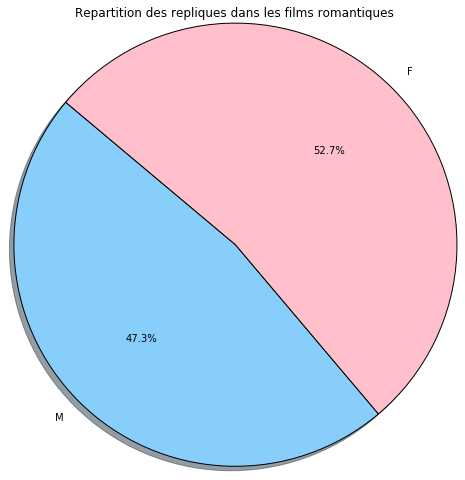

In [12]:
m=sum(male_nb_speech)
f=sum(female_nb_speech)

 
# Data to plot
labels = ["M","F"]
sizes = [m, f]
colors = ['lightskyblue', 'pink']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Repartition des repliques dans les films romantiques") 
plt.axis('equal')
plt.show()

In [13]:
m=len(actions_url)
f=len(romances_url)

 
# Data to plot
labels = ["Actions","Romances"]
sizes = [m, f]
colors = ['lightskyblue', 'pink']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Ratio Actions-Romances parmis les top100") 
plt.axis('equal')
plt.show()

NameError: name 'actions_url' is not defined

In [25]:
def find(df,to_find):
    count=0
    for element in df['text']:
        if to_find in normalize_text(element):
            count+=1
    return count

def find_female_in(df,to_find):
    count_female=0
    count_total=0
    idx=0
    try:
        list_female=list(df[df['gender']=='F']['character_clean'].apply(lambda x : normalize_text(x)))
        list_female=list(set(list_female))
        #list_female.append('she').append('her')
    except Exception as e:
        try:
            
            for element in df['text']:
                if to_find in normalize_text(element):
                    count_total+=1
                    if 'she' in element or "her" in element:
                        count_female+=1
            return count_female,count_total
        except Exception as ex:
            print('Warning : %s.' %(ex))
            return 0,0
    list_female.append('she')
    list_female.append("her")
    for element in df['text']:
        if to_find in normalize_text(element):
            count_total+=1
            for indicator in list_female: #she or her
                if indicator in element:
                    count_female+=1
                    break
        idx+=1
    return count_female,count_total

def find_any(df,l):
    for element in df['text']:
        for room in l:
            if room in normalize_text(element):
                print("Found %s" %room)
    return

def normalize_text(text):
    text = text.lower()
    normal = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore')
    return normal

In [26]:
l=['KITCHEN','Kitchen','kitchen','bed','BED','BEDROOM','Bed','Bedroom','bedroom','BATH','bath','Bath','BATHROOM',
  'Bathroom','bathroom','toilet','TOILET','Toilet']
l_norm=['kitchen','bed','bedroom','bath','bathroom','toilet']

In [45]:
import random
kitchen_count_action=0
kitchen_count_romance=0
rand_idx = random.sample(range(0,len(output_actions)),  len(output_romances))
for df in [output_actions[i] for i in rand_idx]:
    try:
        kitchen_count_action += find(df,'kitchen')
    except Exception as e:
        print(e)
for df in output_romances:
    try:
        kitchen_count_romance += find(df,'kitchen')
    except Exception as e:
        print(e)

'NoneType' object has no attribute '__getitem__'


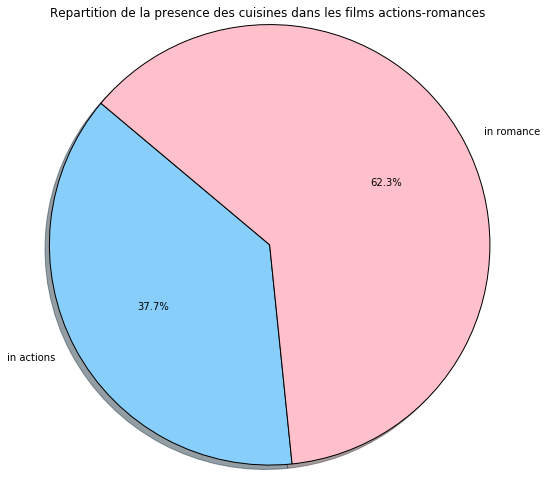

Actions: 60 de présence cuisines
Romances: 99  de présence cuisines


In [46]:
# Data to plot
labels = ["in actions","in romance"]
sizes = [kitchen_count_action, kitchen_count_romance]
colors = ['lightskyblue', 'pink']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Repartition de la presence des cuisines dans les films actions-romances") 
plt.axis('equal')
plt.show()

print('Actions: %s de présence cuisines' %(kitchen_count_action))
print('Romances: %s  de présence cuisines' %(kitchen_count_romance))

In [47]:
kitchen_count_action_f=0
kitchen_count_action =0
kitchen_count_romance_f=0
kitchen_count_romance = 0
for df in output_actions:
    kitchen_count_action_f += find_female_in(df,'kitchen')[0]
    kitchen_count_action += find_female_in(df,'kitchen')[1]
for df in output_romances:
    kitchen_count_romance_f += find_female_in(df,'kitchen')[0]
    kitchen_count_romance += find_female_in(df,'kitchen')[1]

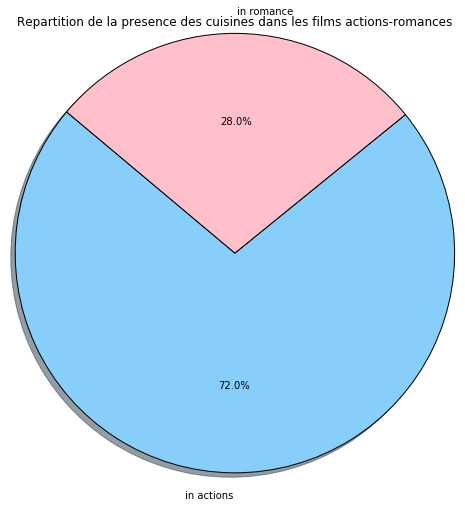

Actions: 95 femmes & cuisines
Romances: 37 femmes & cuisines


In [48]:
# Data to plot
labels = ["in actions","in romance"]
sizes = [kitchen_count_action_f, kitchen_count_romance_f]
colors = ['lightskyblue', 'pink']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Repartition de la presence des cuisines dans les films actions-romances") 
plt.axis('equal')
plt.show()

print('Actions: %s femmes & cuisines' %(kitchen_count_action_f))
print('Romances: %s femmes & cuisines' %(kitchen_count_romance_f))

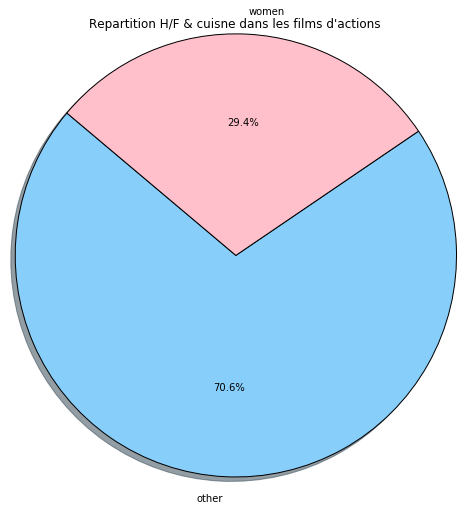

 95 femmes & cuisines
228 autres & cuisines


In [49]:
# Data to plot
labels = ["other","women"]
sizes = [kitchen_count_action - kitchen_count_action_f, kitchen_count_action_f]
colors = ['lightskyblue', 'pink']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Repartition H/F & cuisne dans les films d'actions") 
plt.axis('equal')
plt.show()

print(' %s femmes & cuisines' %(kitchen_count_action_f))
print('%s autres & cuisines' %(kitchen_count_action- kitchen_count_action_f))

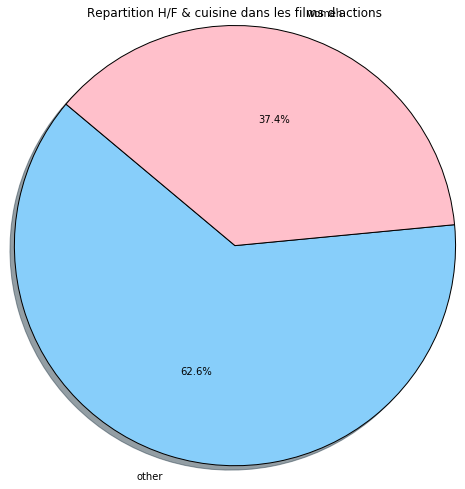

Actions: 95 femmes & cuisines
: 37 femmes & cuisines


In [50]:
# Data to plot
labels = ["other","women"]
sizes = [kitchen_count_romance - kitchen_count_romance_f, kitchen_count_romance_f]
colors = ['lightskyblue', 'pink']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Repartition H/F & cuisine dans les films d'actions") 
plt.axis('equal')
plt.show()

print('Actions: %s femmes & cuisines' %(kitchen_count_action_f))
print('Romances: %s femmes & cuisines' %(kitchen_count_romance_f))